In [2]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from ast import literal_eval

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('Users-08-12.csv')
annotations = pd.read_csv('Annotations-08-12.csv')

In [ ]:
annotations.head()

id  original        lat       long  \
0  cd993bb0-9609-44db-8861-4f95eea51bb2         1  55.702910  12.540513   
1  c687c4e7-b0ad-40bb-b5e8-4d8c73e0dd8a         1  55.703854  12.538563   
2  c51b24e8-2f50-4eae-a108-cc4683eb1f73         1  55.701252  12.538190   
3  8974fabc-4812-4800-8d03-7f904b45e9aa         1  55.853054  12.563505   
4  a09bcd4e-6b63-408c-bf31-aad9d3dae287         1  55.700910  12.538532   

   rating                                            comment  \
0     4.0  Football fields are nice as there is always li...   
1     5.0  Shopping centre close to home is very handy fo...   
2     5.0  Big supermarket nearby with everything you nee...   
3     5.0  I use the train station every day to get into ...   
4     5.0  Metro and s-train nearby is also super conveni...   

                                     category  \
0  ['Recreation/Leisure', 'Exercise/Fitness']   
1                      ['Convenience Stores']   
2         ['Groceries', 'Convenience Stores']   
3                          ['Transportation']   
4                          ['Transportation']   

                              createdby  
0  4722b64c-cf3d-4dc6-8dcc-cf82950b5b79  
1  4722b64c-cf3d-4dc6-8dcc-cf82950b5b79  
2  4722b64c-cf3d-4dc6-8dcc-cf82950b5b79  
3  bf5c0f07-76e6-405a-8a60-52a93c19f48b  
4  4722b64c-cf3d-4dc6-8dcc-cf82950b5b79

In [ ]:
user_data.head()

# Pre-processing
- I will use NLP to highligh keywords in each category using numbers and wordclouds and to model topics

In [68]:
stopwords_set = set(stopwords.words('english'))

In [69]:
def get_words(df_column):

    #Collect all the titles into one large string
    # we first create an empty variable 
    words='' 
    
    for val in df_column:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        words += " ".join(tokens)+" "
        
    return(words)

In [7]:
corpora = {}
corpora['Overall'] = get_words(annotations.comment)

In [8]:
# Exploding categories
def safe_literal_eval(value):
    try:
        return literal_eval(value)
    except (SyntaxError, ValueError):
        return value

annotations['category'] = annotations['category'].apply(safe_literal_eval)
annotations_exploded = annotations.explode('category')

In [9]:
for category in annotations_exploded.category.unique():
    if not type(category) == float:
        words = get_words(annotations_exploded[annotations_exploded.category == category].comment)
        corpora[category] = words

# Word clouds

In [10]:
stopwords_set.update(['nan', 'like', 'look', 'looks'])

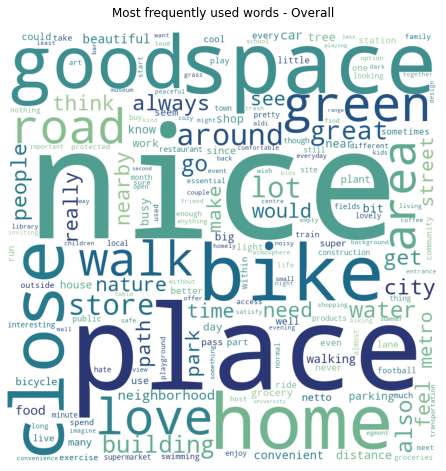

In [34]:
wordcloud = WordCloud(width=800, height=800,
                      colormap='crest',
                      background_color='white',
                      stopwords=stopwords_set,
                      collocations=False,
                      min_font_size=10).generate(corpora['Overall'])

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most frequently used words - Overall', y=1.02)

plt.savefig('wordcloud_all_13-12.png')

plt.show()


## Wordcloud based on category
- create a preprocessing function 

In [80]:
def create_wordcloud(corpus, category, png_name):
    wordcloud = WordCloud(width=800, height=800,
                        colormap='crest',
                        background_color='white',
                        stopwords=stopwords_set,
                        collocations=False,
                        min_font_size=10).generate(corpus)

    # Plot the WordCloud image
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Most frequently used words - ' + category, y=1.02)

    plt.savefig('12-14_wordcloud_'+png_name+'.png')

    plt.show()

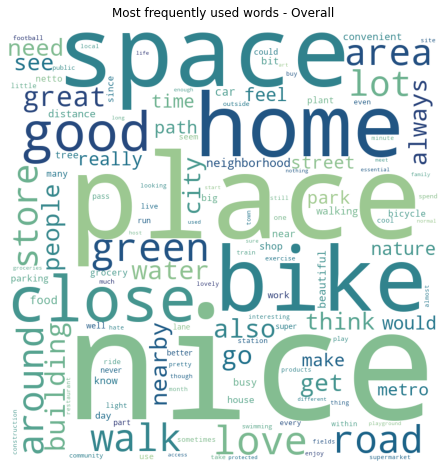

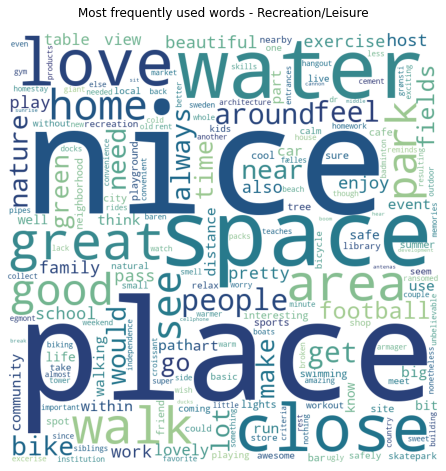

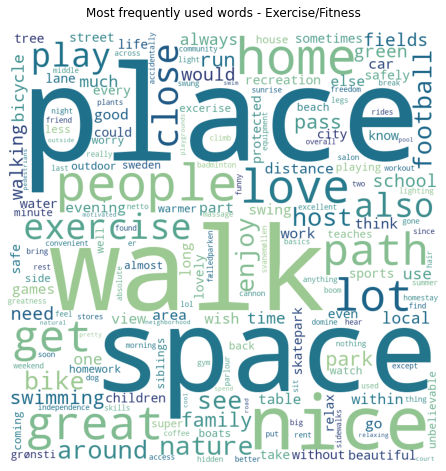

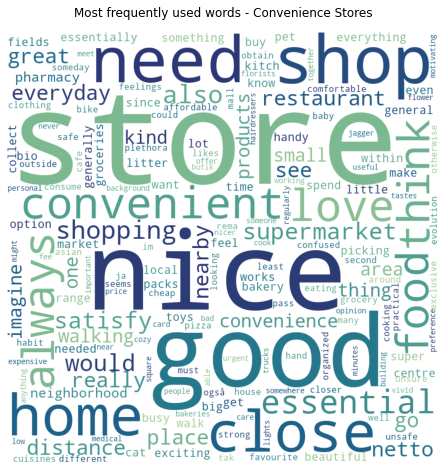

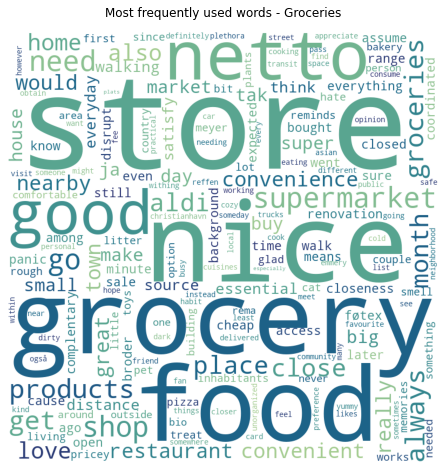

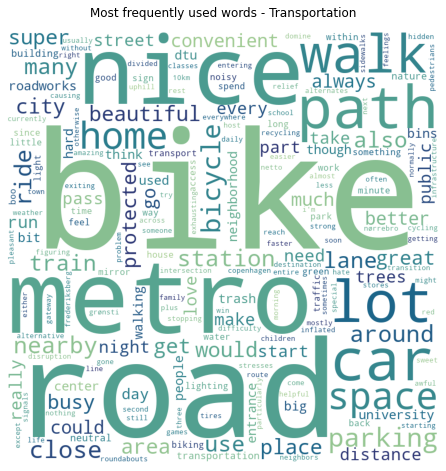

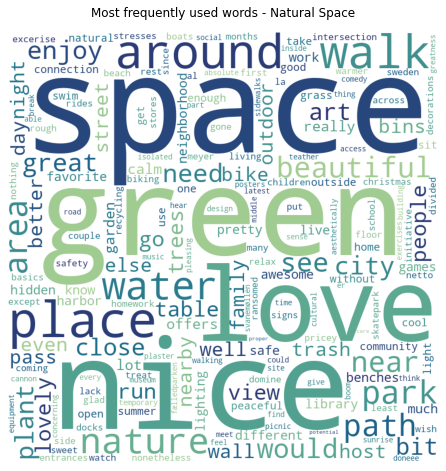

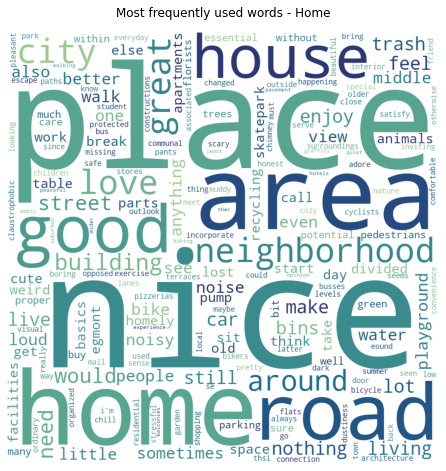

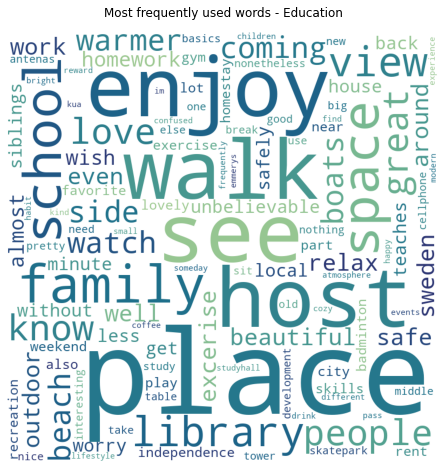

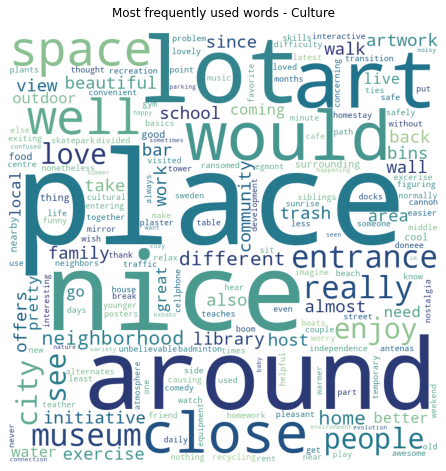

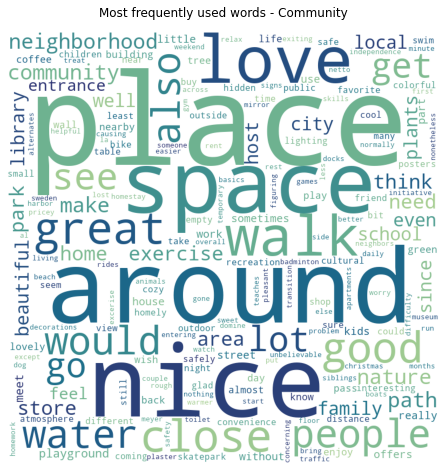

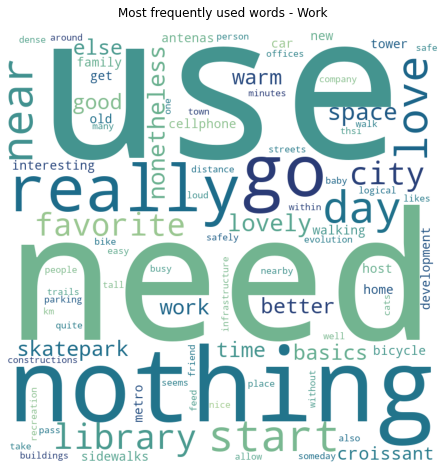

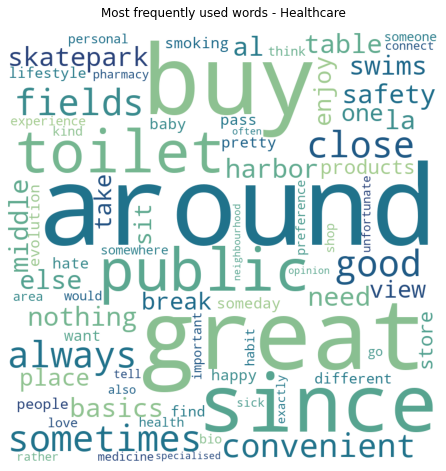

In [36]:
for category, corpus in corpora.items():
    png_name = category.lower().replace('/', '_').replace(' ', '_')
    create_wordcloud(corpus, category, png_name)

# Trying to put them into one figure
- probably too much

In [ ]:
corp = list(corpora.keys())  # Replace with your actual corpora
cat = list(corpora.values())  # Replace with your actual categories

# Set up the grid layout
fig, axes = plt.subplots(nrows=1, ncols=len(corp), figsize=(15, 5))

for i, (corpus, category) in enumerate(zip(corp, cat)):
    wordcloud = WordCloud(max_words=20, width=400, height=400,
                          colormap='coolwarm',
                          background_color='white',
                          stopwords=stopwords_set,
                          collocations=False,
                          max_font_size=50,
                          min_font_size=10).generate(corpus)

    # Plot the WordCloud image on the respective subplot
    axes[i].imshow(wordcloud)
    axes[i].axis("off")
    axes[i].set_title('Most frequently used words - ' + category)

# Adjust layout and show the plot
plt.tight_layout()
# plt.savefig('wordcloud_all_13-12.png')
plt.show()

# Counting words
- most frequent words - thin countplots

In [47]:
def tokenized_text_clean(text):
    # Tokenize the text
    words = word_tokenize(str(text))  # Convert to string to handle NaN values
    
    # Remove punctuation
    words = [word for word in words if word.isalpha()]
    
    # Remove stopwords
    words = [word for word in words if word.lower() not in stopwords_set]
    
    return words

In [48]:
# Example usage
original_text = corpora['Overall']
filtered_text = tokenized_text_clean(original_text)

In [57]:
word_counts = Counter(filtered_text)
common_words = word_counts.most_common(50)

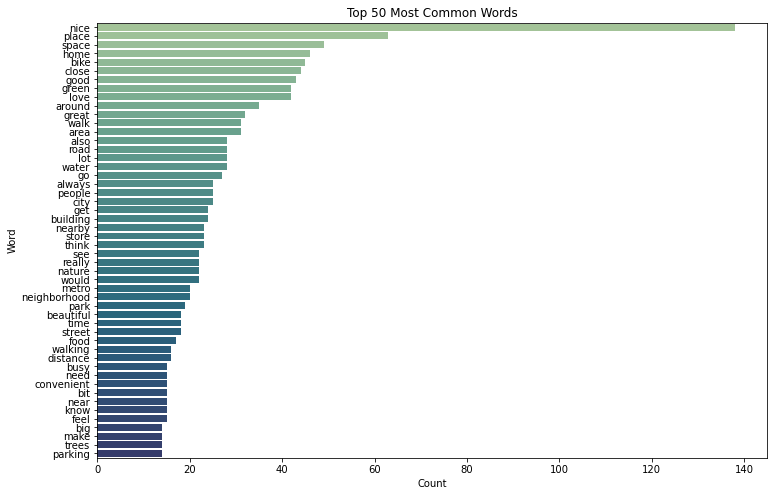

In [59]:
# Convert the data to a DataFrame for easier plotting
df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot using sns.barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df, palette='crest')
plt.title('Top 50 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.savefig('12-13_most_common_words_overall.png')
plt.show()

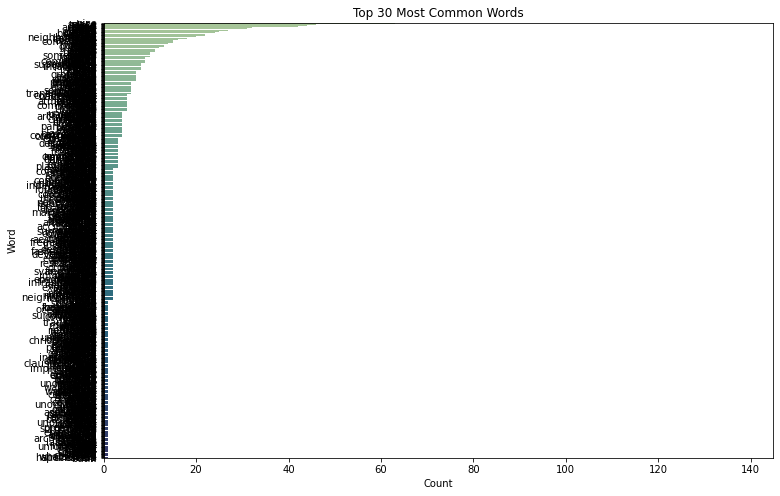

In [56]:
# Convert the data to a DataFrame for easier plotting
df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot using sns.barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df, palette='crest')
plt.title('Top 30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [93]:
# creating a function:

def wordcount_plot(corpus, category, png_name):
    filtered_text = tokenized_text_clean(corpus)
    word_counts = Counter(filtered_text)
    common_words = word_counts.most_common(50)

    # Convert the data to a DataFrame for easier plotting
    df = pd.DataFrame(common_words, columns=['Word', 'Count'])

    # Plot using sns.barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Word', data=df, palette='crest')
    plt.title('Top 50 Most Common Words - '+category)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.savefig('12-13_most_common_words_'+png_name+'.png')
    plt.show()

Finding target words:

In [27]:
target_word = "nan"

target_word_count = word_counts[target_word]

# Print the count of the specific word
print(f"The word '{target_word}' appears {target_word_count} times in the text corpus.")


The word 'nan' appears 238 times in the text corpus.


# Merge based on image ID
- check rating average
- check whether categories fit
- check keywords

# Same with user data!
- likes, dislikes, what is missing
- wordclouds & word frequency

In [88]:
stopwords_set.update(['nan', 'like', 'look', 'looks', 'would'])

In [92]:
# ideal, missing, dislike
user_corpora = {}
for col in ['ideal', 'missing', 'dislike']:
    words = get_words(user_data[col])
    user_corpora[col] = words

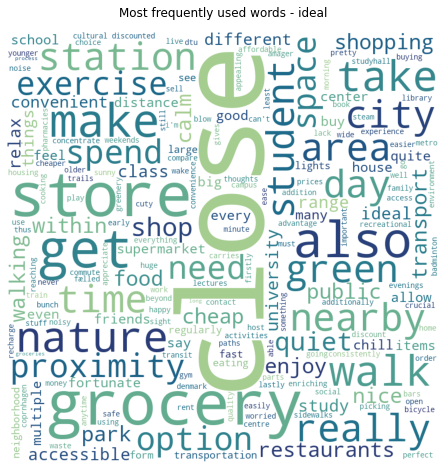

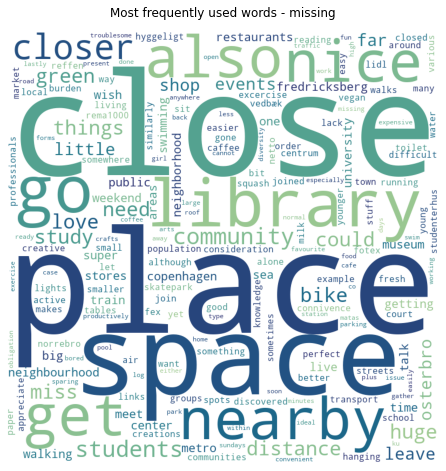

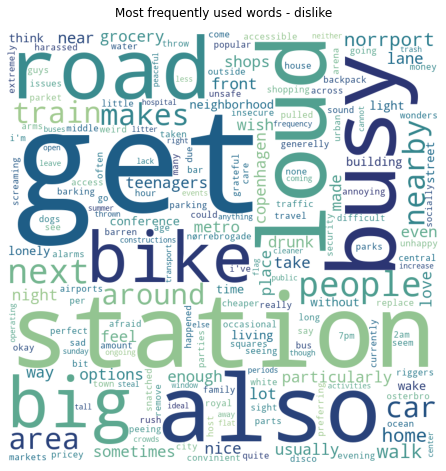

In [91]:
for category, corpus in user_corpora.items():
    png_name = category.lower().replace('/', '_').replace(' ', '_')
    create_wordcloud(corpus, category, png_name)

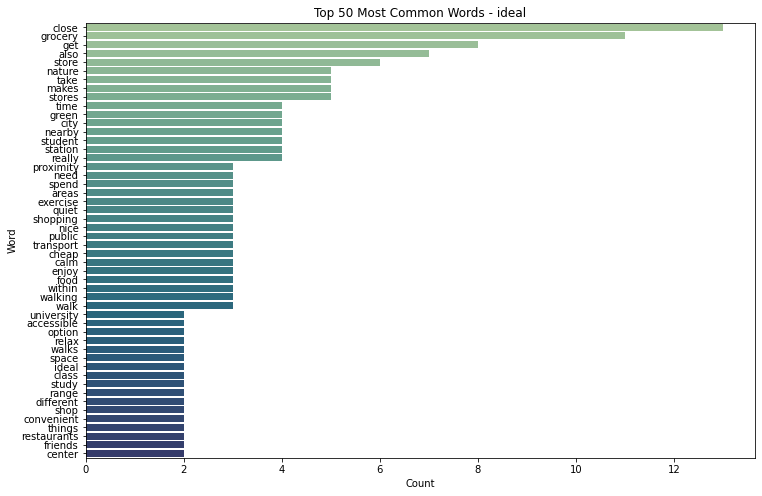

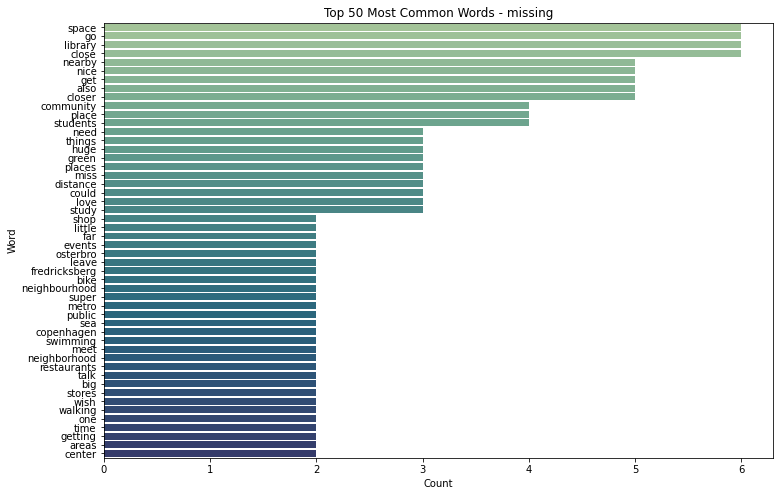

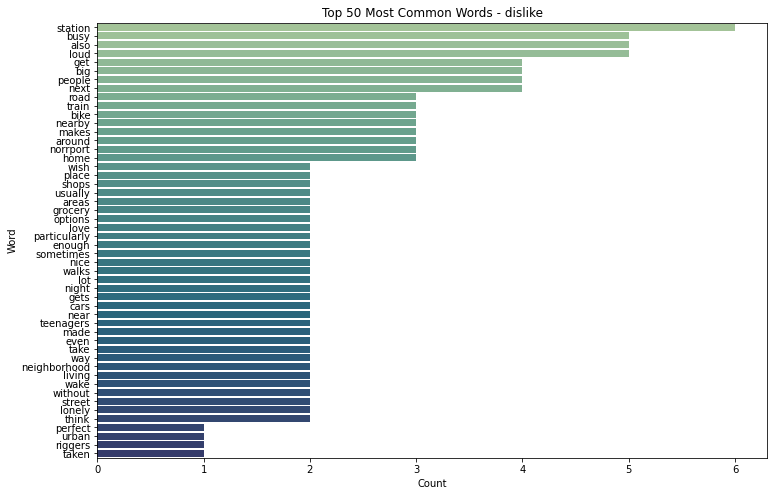

In [94]:
for category, corpus in user_corpora.items():
    png_name = category.lower().replace('/', '_').replace(' ', '_')
    wordcount_plot(corpus, category, png_name)

# Further ideas for investigation:
- topic modelling
- keyword mapping: how likely is a keyword rated positive/negative